REAL ESTATE REGRESSION CHALLENGE 

blue print for future regression analysis 

... also jupyter notebooks are the shit


In [4]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import joblib
%matplotlib inline


In [5]:
# read and load csv
real_estate_data = pd.read_csv(
    "./real_estate.csv"
)
# print the first n lines of the data as read
print(real_estate_data.head(10))
# get the label column
label = real_estate_data[real_estate_data.columns[-1]]
# create a subplot for 2 subplots - 2 rows, 1 column


   transaction_date  house_age  transit_distance  local_convenience_stores  \
0          2012.917       32.0          84.87882                        10   
1          2012.917       19.5         306.59470                         9   
2          2013.583       13.3         561.98450                         5   
3          2013.500       13.3         561.98450                         5   
4          2012.833        5.0         390.56840                         5   
5          2012.667        7.1        2175.03000                         3   
6          2012.667       34.5         623.47310                         7   
7          2013.417       20.3         287.60250                         6   
8          2013.500       31.7        5512.03800                         1   
9          2013.417       17.9        1783.18000                         3   

   latitude  longitude  price_per_unit  
0  24.98298  121.54024            37.9  
1  24.98034  121.53951            42.2  
2  24.98746  121.5

/var/folders/86/0w1sf6nx5s13xc31_0ytf3_40000gn/T/ipykernel_15979/1764290265.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


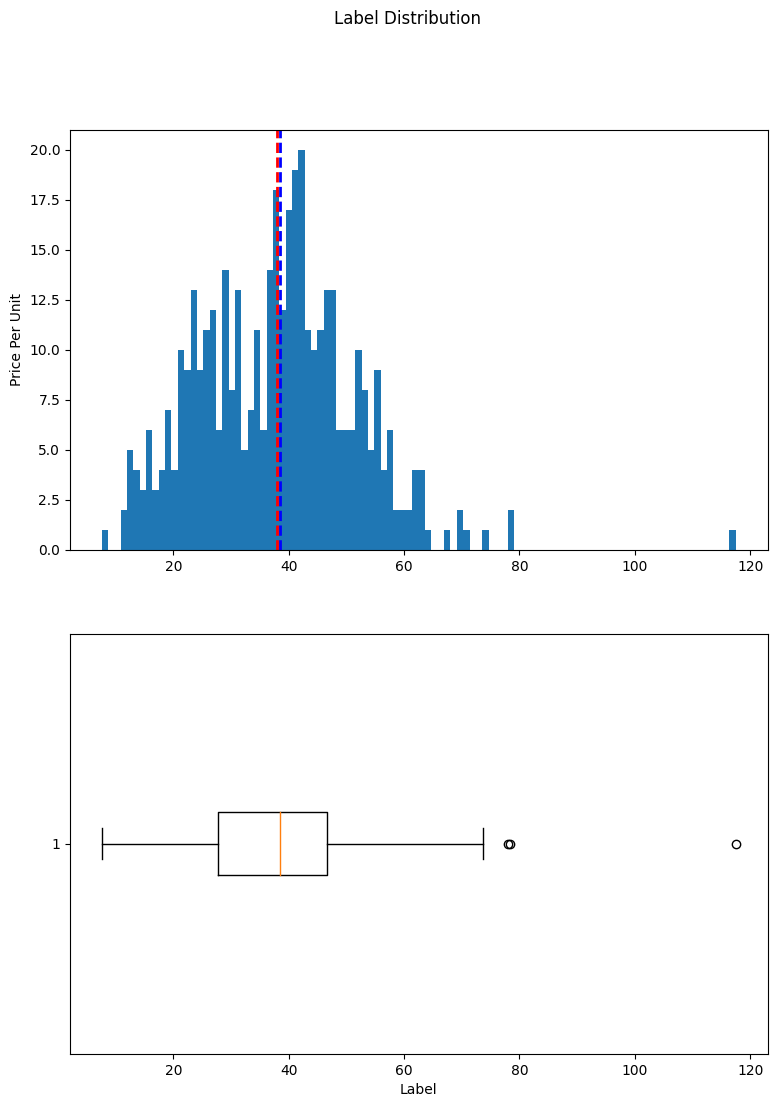

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(9, 12))

# plot the histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel("Price Per Unit")

# ass lines for mean & median
ax[0].axvline(label.mean(), color="red", linestyle="dashed", linewidth=2)
ax[0].axvline(label.median(), color="blue", linestyle="dashed", linewidth=2)

# plot the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel("Label")

# add a title to the figure
fig.suptitle("Label Distribution")

fig.show()

/var/folders/86/0w1sf6nx5s13xc31_0ytf3_40000gn/T/ipykernel_15979/2910705789.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


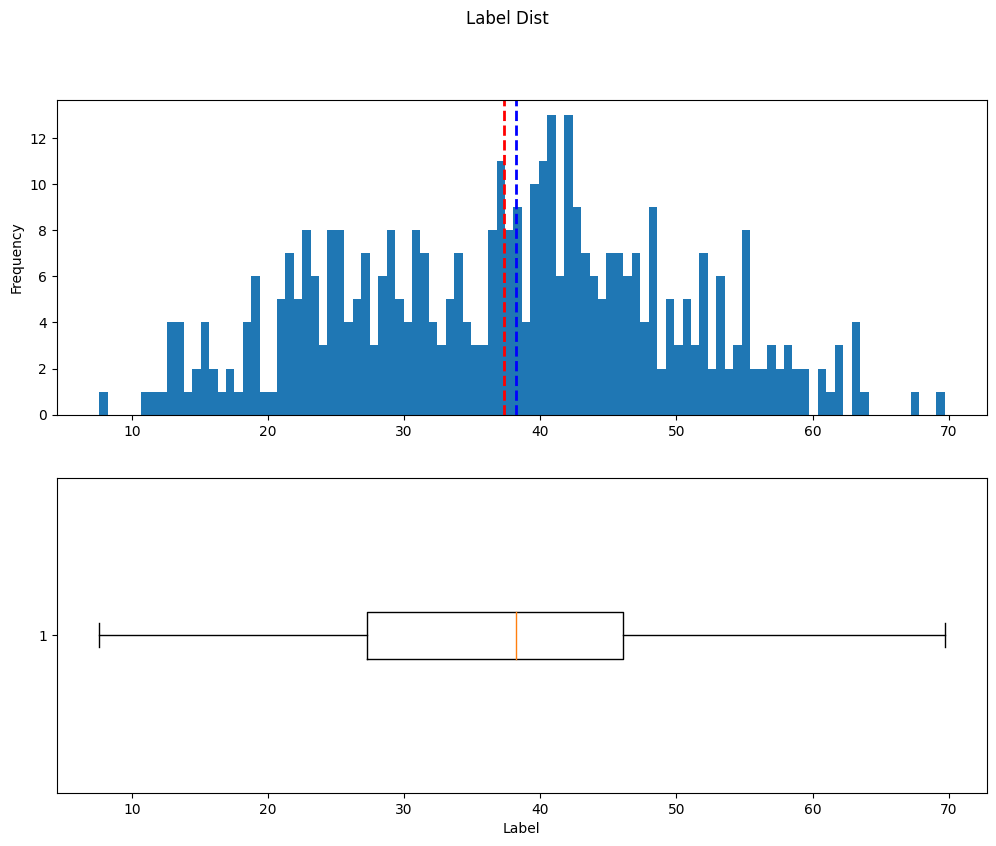

In [7]:
# remove outliers

real_estate_data = real_estate_data[real_estate_data["price_per_unit"] < 70]
label = real_estate_data[real_estate_data.columns[-1]]

fig, ax = plt.subplots(2, 1, figsize = (12, 9))

ax[0].hist(label, bins=100)
ax[0].set_ylabel("Frequency")
ax[0].axvline(label.mean(), color="red", linestyle="dashed", linewidth=2)
ax[0].axvline(label.median(), color="blue", linestyle="dashed", linewidth=2)

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel("Label")

fig.suptitle("Label Dist")
fig.show()



View Numeric Correlations


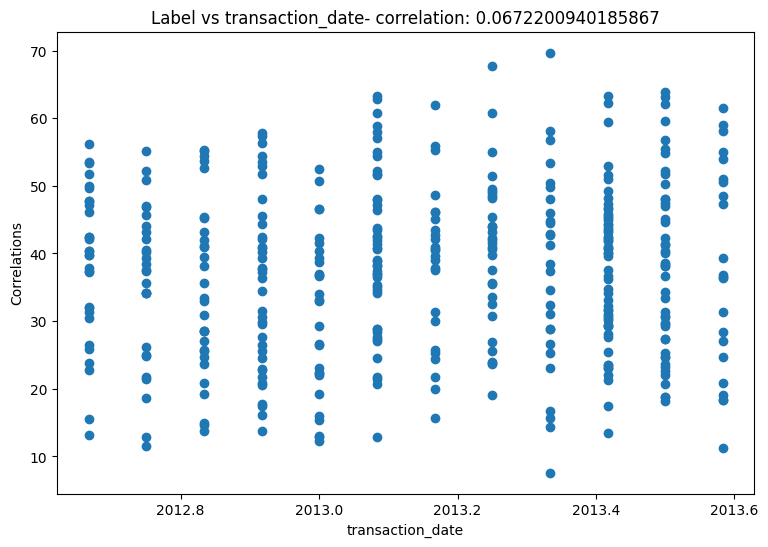

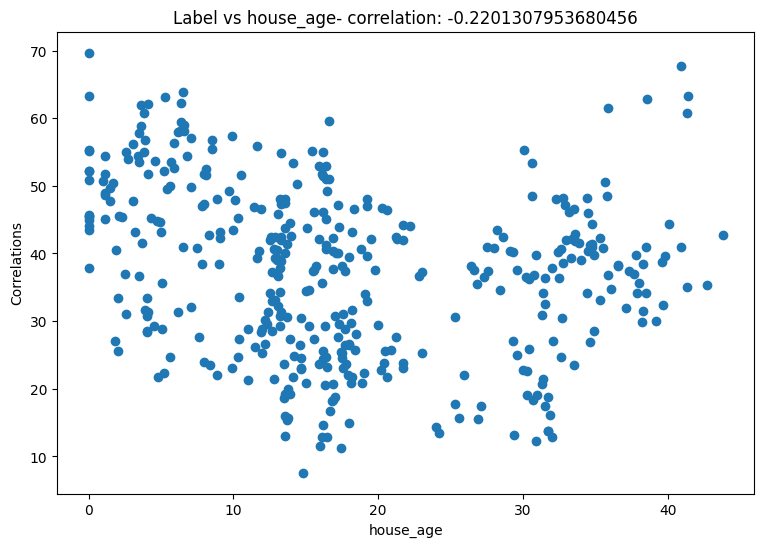

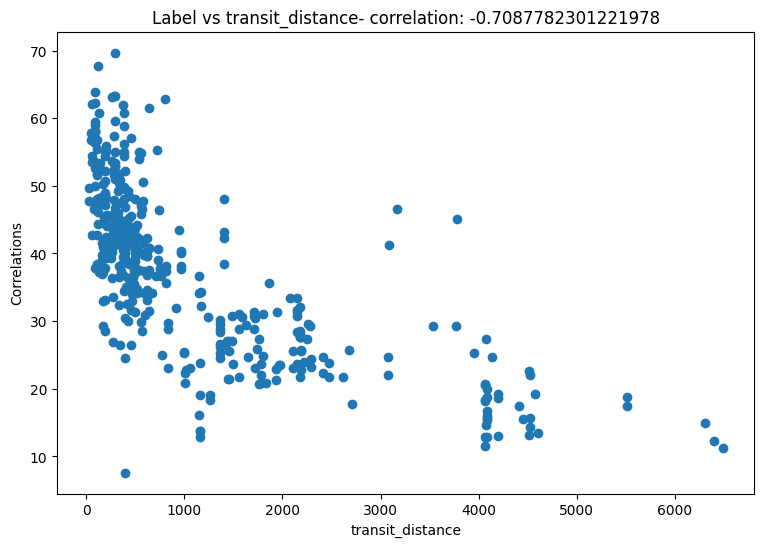

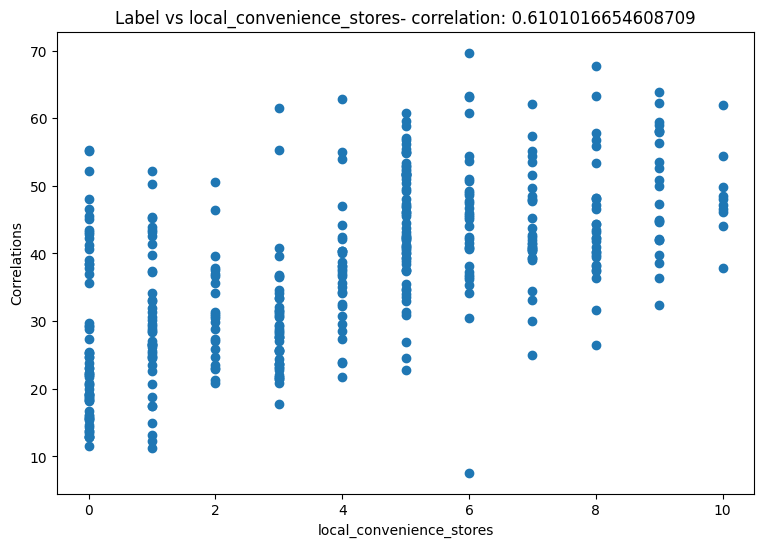

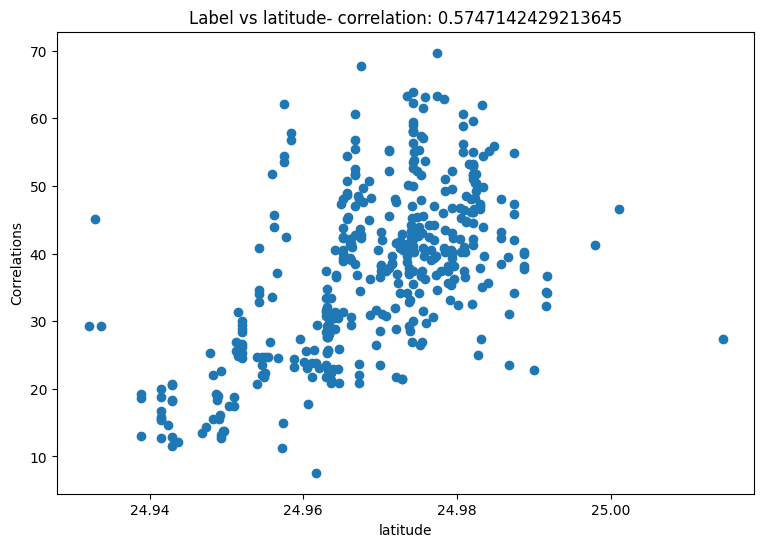

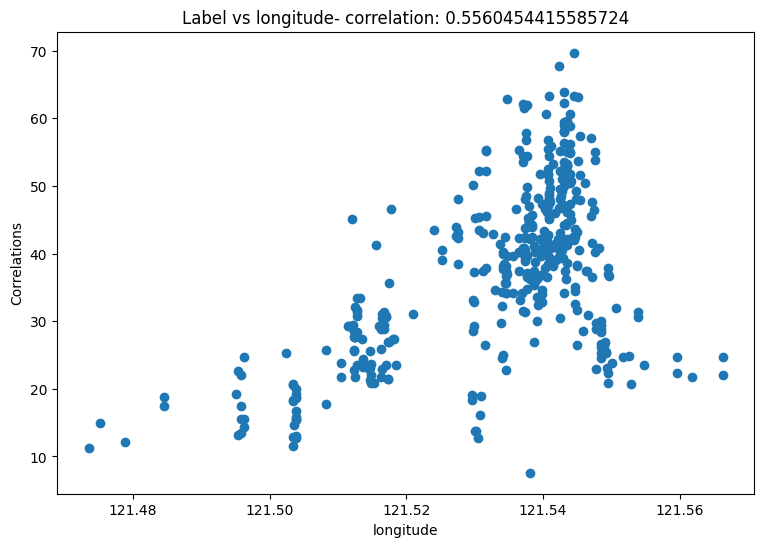

In [8]:
# correlations 

for col in real_estate_data[real_estate_data.columns[0:-1]]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = real_estate_data[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel("Correlations")
    ax.set_title("Label vs " + col + "- correlation: " + str(correlation))
plt.show()

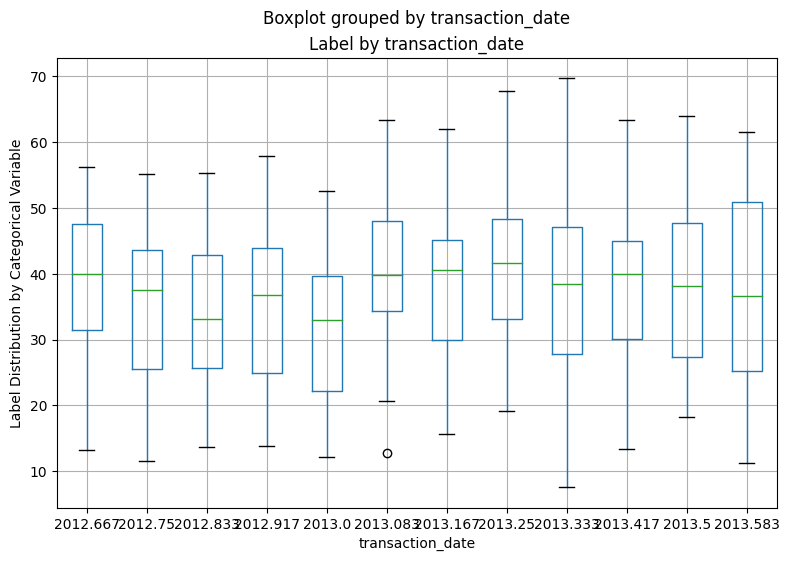

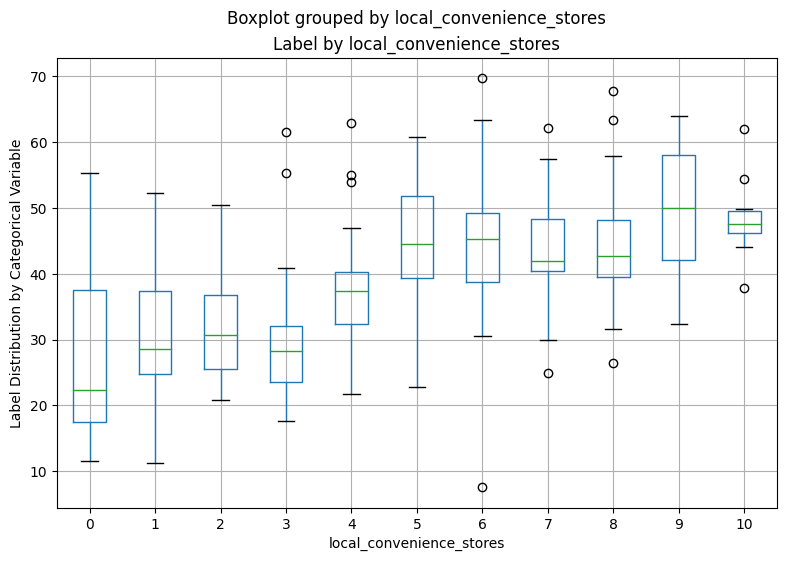

In [9]:
# reminder, some of the features may work better if treated as a categorical feature (see discrete values)
for col in real_estate_data[['transaction_date', 'local_convenience_stores']]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    real_estate_data.boxplot(column = 'price_per_unit', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Label Distribution by Categorical Variable")
plt.show()

SEPARATE FEATURES AND LABEL - ALSO SPLIT DATA FOR (1) TRAINING & (2) VALIDATION

In [10]:
# Separate features (columns 1 [house_age] to the last but one) and labels (the last column)
X, y = real_estate_data[real_estate_data.columns[1:-1]].values, real_estate_data[real_estate_data.columns[-1]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print("Training Set: %d rows\nTest Set: %d rows" % (X_train.shape[0], X_test.shape[0]))


Training Set: 285 rows
Test Set: 123 rows


PREPROCESS THE DATA AND TRAIN A MODEL IN A PIPELINE 

normalize the numeric features, then use RandomForestRegressor to train the model.

In [11]:
# train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# define the preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

# combine the preprocessing steps 
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
    ]
)

# create preprocesing and training pipeline
pipeline = Pipeline(steps=[("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor())])

# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print(model)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


EVALUATE THE MODEL 


MSE: 38.07178413209957
RMSE: 6.1702337177857025
R2: 0.6751317463287632


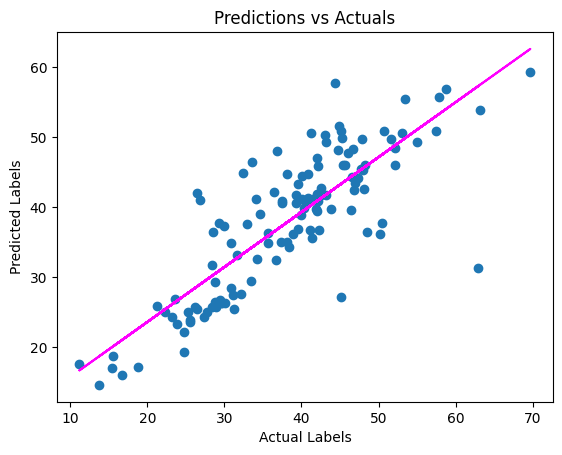

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

USE THE TRAINED MODEL

save the trained model, and then use it to predict the price-per-unit for the following real estate transactions 

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [13]:
import joblib

# save the model as a pickle file
filename = "./real_estate_model.pkl"
joblib.dump(model, filename)

# load the model from the file

loaded = joblib.load(filename)

# add an array with the necessary parameters for prediction
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
    [13.6,4082.015,0,24.94155,121.5038]])

# use the model to predict the unit price 
results = loaded.predict(X_new)
print("Predictions:")
for prediction in results:
    print(round(prediction,2))
    

Predictions:
49.24
16.93
